# Lending Club Case Study

The loan dataset in the case study contains information about past loan applicants and whether they ‘defaulted’ or not. The goal of this exercise is to use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## Basic Data Understanding

In [106]:
#Setup prerequisite - This code assumes the 'loan.csv file is present in the local location as this python file'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

#Read the data and try to get a basic understanding of the dataset
loan = pd.read_csv('loan.csv')

print("Number of Rows and Columns in this dataset :",loan.shape)
print("The Columns in this data set are :",loan.columns.values)


Number of Rows and Columns in this dataset : (39717, 111)
The Columns in this data set are : ['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'verification_status' 'issue_d'
 'loan_status' 'pymnt_plan' 'url' 'desc' 'purpose' 'title' 'zip_code'
 'addr_state' 'dti' 'delinq_2yrs' 'earliest_cr_line' 'inq_last_6mths'
 'mths_since_last_delinq' 'mths_since_last_record' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'initial_list_status' 'out_prncp'
 'out_prncp_inv' 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp'
 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt' 'next_pymnt_d'
 'last_credit_pull_d' 'collections_12_mths_ex_med'
 'mths_since_last_major_derog' 'policy_code' 'application_type'
 'annual_inc_joint' 'dti_joint' 'verification_status_joint'
 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal' 'open

/Users/ssounda/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [107]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


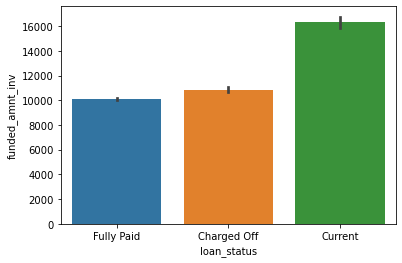

In [108]:
print(loan['loan_status'].value_counts())

sns.barplot(x="loan_status", y="funded_amnt_inv", data=loan)

plt.show()


## Data Cleanup

### Get a summary of the columns that have null values

In [109]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Drop columns that have 95% or more as null values

In [110]:
loan = loan.dropna(axis='columns',thresh=0.95*len(loan))

In [111]:
print("Number of Rows and Columns in this dataset :",loan.shape)
print("The Columns in this data set are :",loan.columns.values)
loan.head()

Number of Rows and Columns in this dataset : (39717, 52)
The Columns in this data set are : ['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_length'
 'home_ownership' 'annual_inc' 'verification_status' 'issue_d'
 'loan_status' 'pymnt_plan' 'url' 'purpose' 'title' 'zip_code'
 'addr_state' 'dti' 'delinq_2yrs' 'earliest_cr_line' 'inq_last_6mths'
 'open_acc' 'pub_rec' 'revol_bal' 'revol_util' 'total_acc'
 'initial_list_status' 'out_prncp' 'out_prncp_inv' 'total_pymnt'
 'total_pymnt_inv' 'total_rec_prncp' 'total_rec_int' 'total_rec_late_fee'
 'recoveries' 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt'
 'last_credit_pull_d' 'collections_12_mths_ex_med' 'policy_code'
 'application_type' 'acc_now_delinq' 'chargeoff_within_12_mths'
 'delinq_amnt' 'pub_rec_bankruptcies' 'tax_liens']


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Analyse and Drop columns that predominantly have only single values. They are not going to be much helpful for our analysis

In [112]:
print(loan['pymnt_plan'].value_counts())
print(loan['initial_list_status'].value_counts())
print(loan['collections_12_mths_ex_med'].value_counts())
print(loan['acc_now_delinq'].value_counts())
print(loan['chargeoff_within_12_mths'].value_counts())
print(loan['delinq_amnt'].value_counts())
print(loan['tax_liens'].value_counts())
print(loan['application_type'].value_counts())
print(loan['pub_rec_bankruptcies'].value_counts())



n    39717
Name: pymnt_plan, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
0.0    39661
Name: chargeoff_within_12_mths, dtype: int64
0    39717
Name: delinq_amnt, dtype: int64
0.0    39678
Name: tax_liens, dtype: int64
INDIVIDUAL    39717
Name: application_type, dtype: int64
0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [113]:
# remove other non-required columns
# id - not required
# member_id - not required
# funded_amnt -  funded_amnt_inv reflects the actual funded to person
# url - not useful
# zip_code - zip_code is incomplete and has only the same information as addr_state
# The following features have only limited values or they are relevant post approval and not useful for current analysis
# delinq_2yrs 
# revol_bal 
# out_prncp
# out_prncp_inv 
# total_pymnt
# total_pymnt_inv 
# total_rec_prncp 
# total_rec_int 
# total_rec_late_fee
# recoveries 
# collection_recovery_fee 
# last_pymnt_d
# last_credit_pull_d 
# last_pymnt_amnt 
# collections_12_mths_ex_med 
# policy_code 
# chargeoff_within_12_mths 
# pub_rec_bankruptcies 
#title
#inq_last_6mths
#pub_rec


colsToDrop = ['id', 'member_id','funded_amnt','url','zip_code','pymnt_plan', 'delinq_2yrs',
              'initial_list_status','collections_12_mths_ex_med','acc_now_delinq',
              'revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
              'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
              'last_pymnt_d','last_credit_pull_d','last_pymnt_amnt','collections_12_mths_ex_med',
              'policy_code','chargeoff_within_12_mths','pub_rec_bankruptcies',
             'chargeoff_within_12_mths','delinq_amnt','tax_liens','application_type',
             'title','inq_last_6mths','pub_rec']
loan.drop(colsToDrop,axis=1,inplace=True)


In [114]:
print("Number of Rows and Columns in this dataset :",loan.shape)
print("The Columns in this data set are :",loan.columns.values)
loan.head()

Number of Rows and Columns in this dataset : (39717, 20)
The Columns in this data set are : ['loan_amnt' 'funded_amnt_inv' 'term' 'int_rate' 'installment' 'grade'
 'sub_grade' 'emp_length' 'home_ownership' 'annual_inc'
 'verification_status' 'issue_d' 'loan_status' 'purpose' 'addr_state'
 'dti' 'earliest_cr_line' 'open_acc' 'revol_util' 'total_acc']


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,open_acc,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,3,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,3,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,10,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,Jan-96,15,53.90%,38


### Extract and Convert term, int_rate,revolv_util to a numeric value

In [115]:
loan['term'] = loan['term'].apply(lambda k: pd.to_numeric(k.removesuffix('months')))

In [116]:
loan['int_rate'] = loan['int_rate'].apply(lambda k: pd.to_numeric(k.removesuffix('%')))

In [117]:
loan.dropna(axis=0, subset=["revol_util"], inplace=True)
loan['revol_util'] = loan['revol_util'].apply(lambda k: pd.to_numeric(k.removesuffix('%')))

### Split and convert Date fields to Month and Year 

In [118]:
loan['issue_year'] = pd.to_datetime(loan['issue_d'],format="%b-%y").dt.year
loan['issue_month'] = pd.to_datetime(loan['issue_d'],format="%b-%y").dt.month
loan['earliest_cr_line_year'] = pd.to_datetime(loan['earliest_cr_line'],format="%b-%y").dt.year
loan['earliest_cr_line_month'] = pd.to_datetime(loan['earliest_cr_line'],format="%b-%y").dt.month

### Convert emp_length to a numeric value

In [119]:

loan['emp_length'] = loan['emp_length'].str.extract('(\d+)')
loan['emp_length'] = pd.to_numeric(loan['emp_length'])

### Analyse and provide outlier treatment to the columns annual_inc, total_acc

In [120]:
loan['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count      39667.000000
mean       68999.523758
std        63789.465449
min         4000.000000
25%        40516.320000
50%        59000.000000
75%        82400.000000
max      6000000.000000
Name: annual_inc, dtype: object

In [121]:
loan['total_acc'].describe()

count    39667.000000
mean        22.103411
std         11.398386
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [122]:

loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]
loan = loan[loan["total_acc"] < loan["total_acc"].quantile(0.99)]

### Filter and remove records with loan_status as 'Current'. Use only 'Fully Paid' and 'Charged Off' records

In [123]:
loan = loan[loan['loan_status'].isin(['Charged Off','Fully Paid'])]
chargedOff = loan[loan['loan_status'] == 'Charged Off']
fullyPaid = loan[loan['loan_status'] == 'Fully Paid']

In [126]:
# create loan_status_bin as Fully Paid to 0 and Charged Off to 1. This will help us aggregate charged off loan easily
loan["loan_status_bin"] = loan["loan_status"].apply(lambda k: 0 if k == "Fully Paid" else 1)

## Data Analysis

### Analyse the percentage of chargedoff loans by the grade

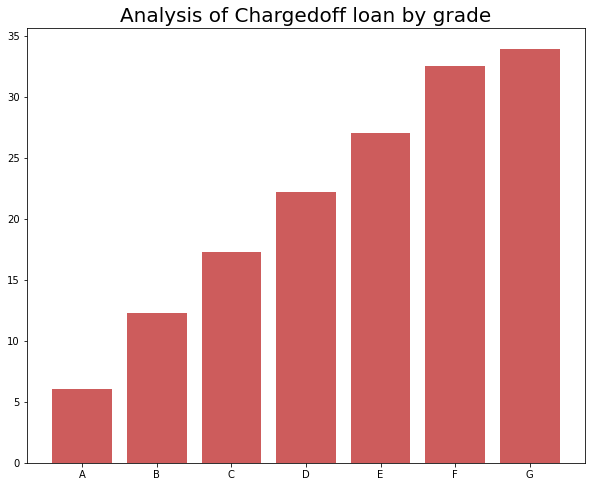

In [127]:
plt.figure(figsize=(10,8))
pctChargedOff = []
grades = sorted(loan['grade'].unique())
for grade in grades:
    gradeFilter  = loan[loan['grade']==grade]
    totalCount = len(gradeFilter)
    chargedoffCount = len(loan[(loan['grade']==grade) & (loan['loan_status_bin'] == 1)])
    pctChargedOff.append((chargedoffCount/totalCount)*100)
plt.bar(grades, pctChargedOff, color='indianred')
plt.title("Analysis of Chargedoff loan by grade",fontsize=20,
          color="black")
plt.show()

###  *Findings - The chargedoff loan % increases as there is a degradation in the grade of the loan* 

### Analyse the chargedoff loans by the term

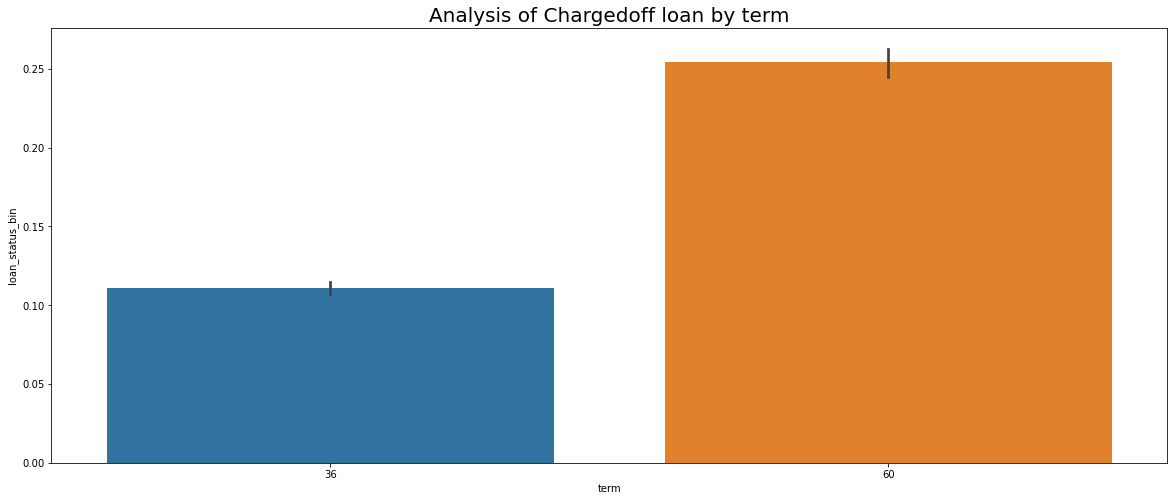

In [128]:
plt.figure(figsize=(20,8))
plt.title("Analysis of Chargedoff loan by term",fontsize=20,
          color="black")
sns.barplot(x='term', y='loan_status_bin', data=loan)
plt.show()

### *Findings - The chargedoff loan increases as there is an ncrease in the term of the loan*


### Analyse the Chargedoff loan by int_rate

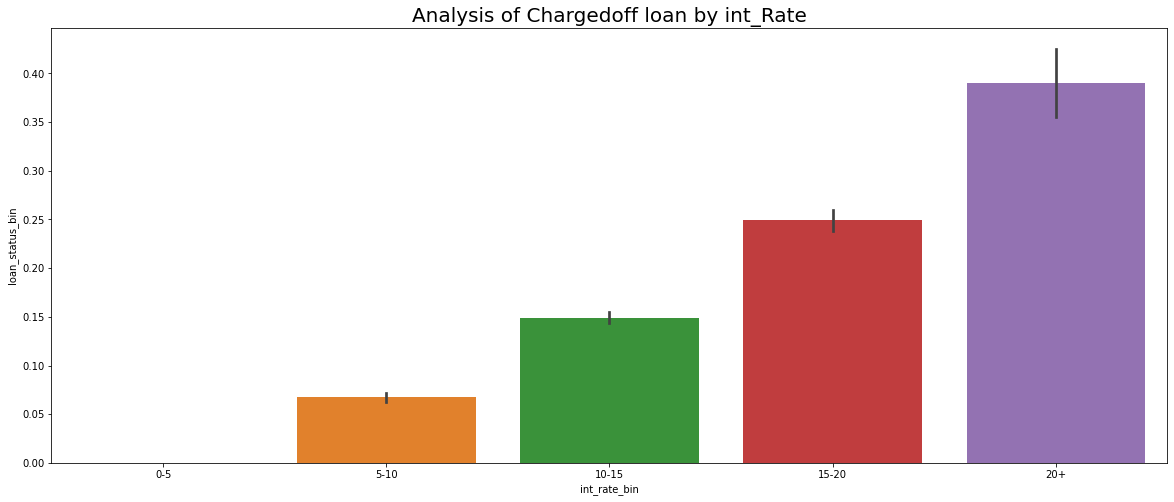

In [129]:


# Bin the int_rate
bins = [0, 5, 10, 15, 20, 100]
bucket = ['0-5', '5-10', '10-15', '15-20', '20+']
loan['int_rate_bin'] = pd.cut(loan['int_rate'], bins, labels=bucket)

plt.figure(figsize=(20,8))
plt.title("Analysis of Chargedoff loan by int_Rate",fontsize=20,
          color="black")
sns.barplot(x='int_rate_bin', y='loan_status_bin', data=loan)
plt.show()

###  *Findings - The chargedoff loan % increases as there is a increase in the int_rate* 

### Analyse the chargedoff loan by dti

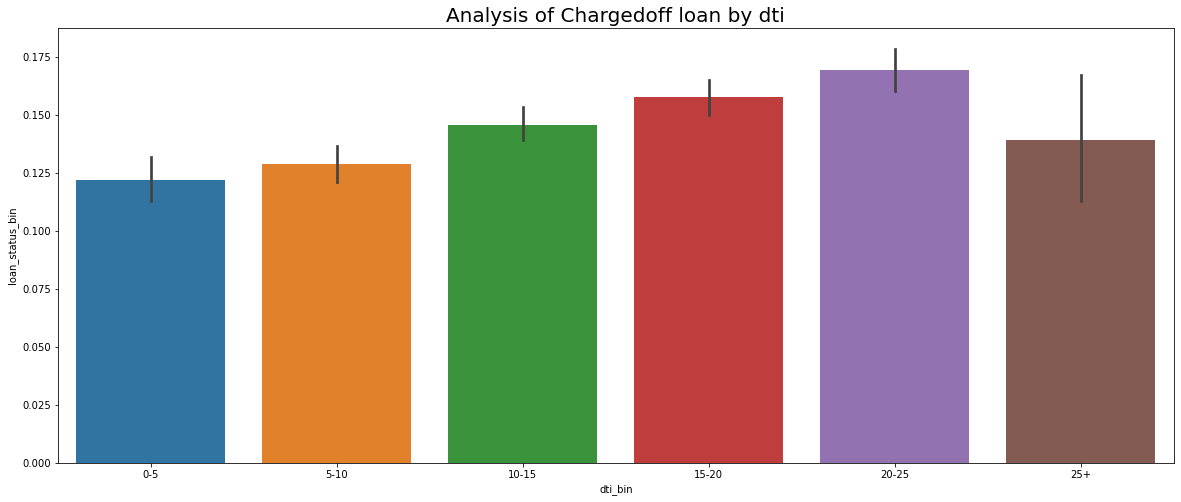

In [130]:
#bin the dti
bins = [0, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket = ['0-5', '5-10', '10-15', '15-20', '20-25','25+']
loan['dti_bin'] = pd.cut(loan['dti'], bins, labels=bucket)

plt.figure(figsize=(20,8))
plt.title("Analysis of Chargedoff loan by dti",fontsize=20,
          color="black")
sns.barplot(x='dti_bin', y='loan_status_bin', data=loan)
plt.show()

###  *Findings - The chargedoff loan increases as there is a increase in the dti* 

### Analyse the Chargedoff loan by funded_amnt_inv

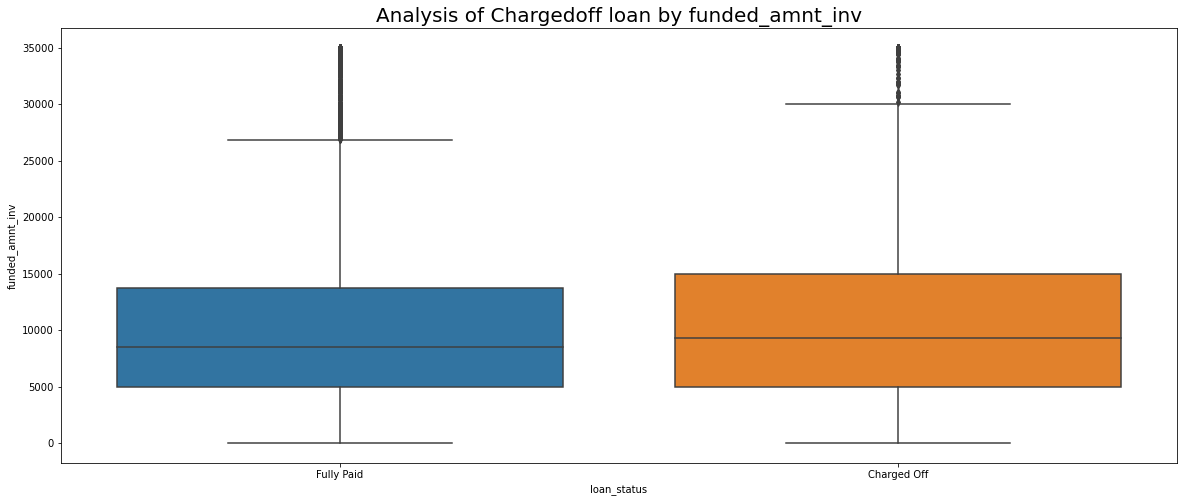

In [131]:
plt.figure(figsize=(20,8))
plt.title("Analysis of Chargedoff loan by funded_amnt_inv",fontsize=20,
          color="black")
sns.boxplot(data=loan, x="loan_status",y="funded_amnt_inv" )
plt.show()

### *Findings The median and the quantile ranges are almost the same for Chargedoff and FullyPaid Loans. The outliers indicate the higher the funded_amnt_inv the higher the risk of Chargedoff*

### Analyse chargedoff loan by addr_state

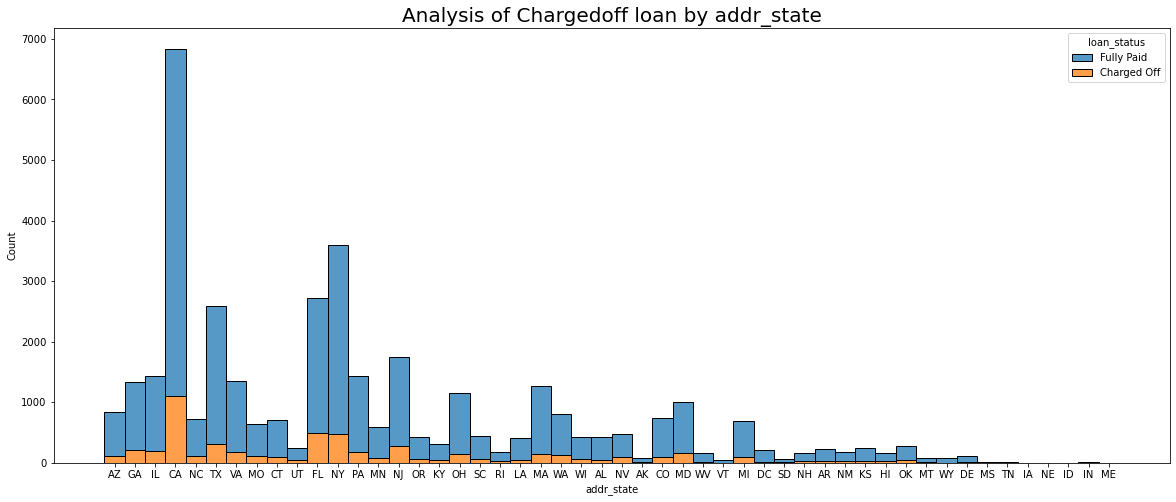

In [52]:
plt.figure(figsize=(20,8))
plt.title("Analysis of Chargedoff loan by addr_state",fontsize=20,
          color="black")

sns.histplot(data=loan, x="addr_state", hue="loan_status",multiple="stack")
plt.show()

### *Findings There are no significant findings for chargedoff in relevance to the addr_state*

### Analyse chargedoff loan by annual_inc

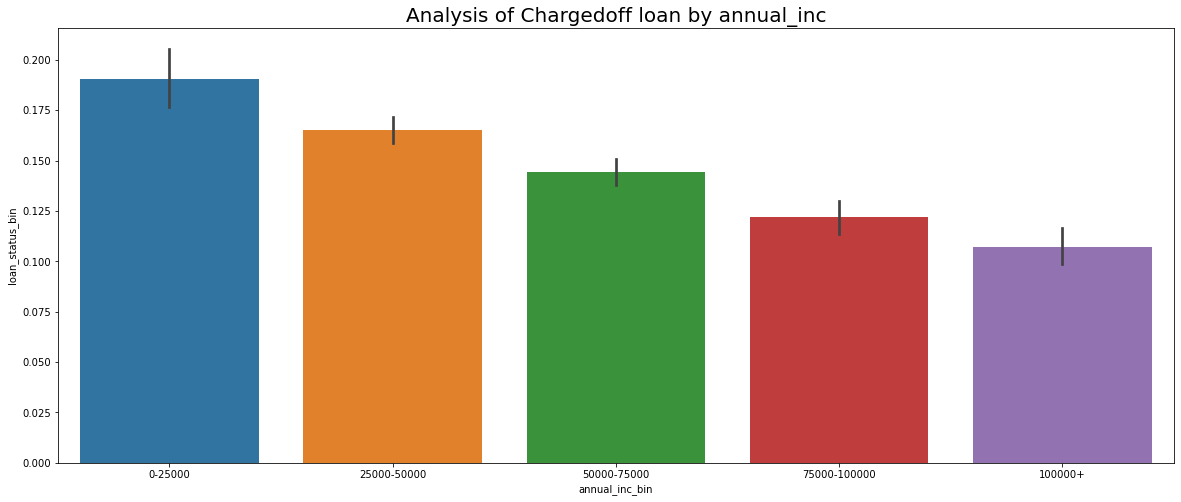

In [105]:
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loan['annual_inc_bin'] = pd.cut(loan['annual_inc'], bins, labels=bucket)

plt.figure(figsize=(20,8))
plt.title("Analysis of Chargedoff loan by annual_inc",fontsize=20,
          color="black")
sns.barplot(x='annual_inc_bin', y='loan_status_bin', data=loan)
plt.show()

### *Findings The chargeoff decreases as there is an increase in the annual_inc*

### Heatmap analysis

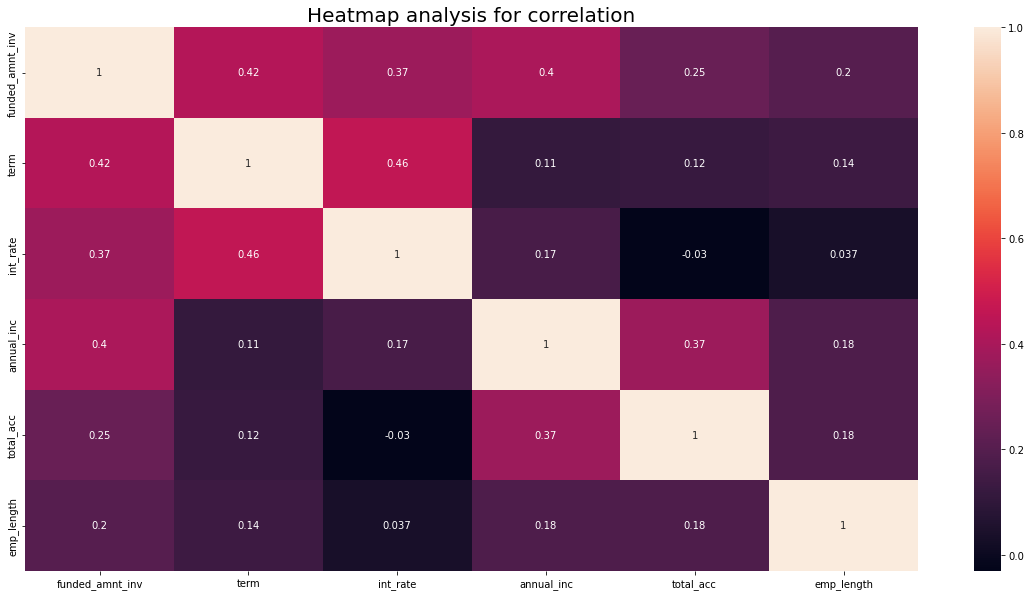

In [57]:
plt.figure(figsize=(20,10))
plt.title("Heatmap analysis for correlation",fontsize=20,
          color="black")
hf = chargedOff[['funded_amnt_inv', 'term','int_rate','annual_inc','total_acc','emp_length']]

     
sns.heatmap(hf.corr(), 
            xticklabels=hf.columns,
            yticklabels=hf.columns,
            annot=True,
            )
plt.show()

### *Findings The red boxes indicate entities of higher correlation 
funded_amnt_inv  and term, \
term and int_rate, \
funded_amnt_inv and int_rate,   \
funded_amnt_inv and annual_inc *